Биномиальный закон распределения  
На военном складе хранится 15 ракет. Вероятность того, что ракета неисправна и не пройдет предпусковую проверку, составляет 0.1. Для учебных стрельб случайным образом отбирают 5 ракет. Случайная величина X — количество неисправных ракет среди отобранных. Найти закон распределения, математическое ожидание, дисперсию, среднее квадратическое отклонение и моду. Построить многоугольник распределения.

In [29]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np

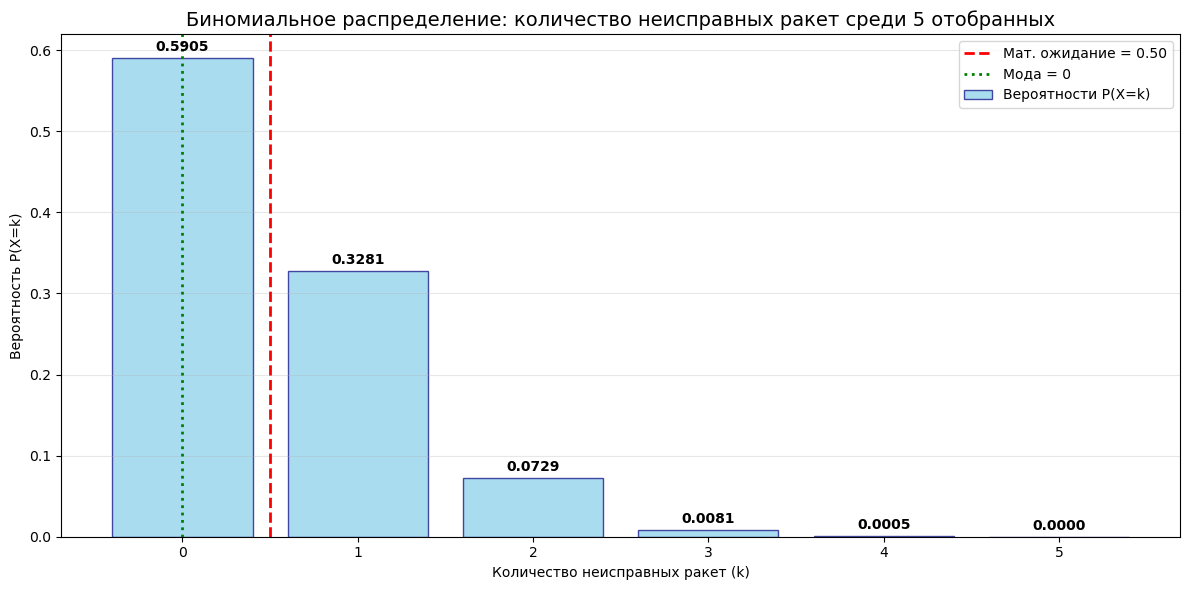

Биномиальное распределение с n = 5 , p = 0.1
Закон распределения:
         0
0  0.59049
1  0.32805
2  0.07290
3  0.00810
4  0.00045
5  0.00001

Мат.ожидание:  0.5
Дисперсия:  0.45
Ср. кв. отклонение:  0.6708203932499369
Мода:  0


In [30]:
# Биномиальный закон распределения
def binom(n, k, p):
    """Биномиальное распределение"""
    return math.comb(n, k) * (p ** k) * ((1 - p) ** (n - k))

# Параметры распределения
n = 5  # Количество отобранных ракет
p = 0.1  # Вероятность неисправности одной ракеты

# Заполнение закона распределения
X_binom = {}
for k in range(n + 1):
    X_binom[k] = binom(n, k, p)

df_binom = pd.DataFrame(data=X_binom.values(), index=X_binom.keys())

# Математическое ожидание
m_binom = n * p

# Дисперсия
d_binom = n * p * (1 - p)

# Среднее квадратичное отклонение
w_binom = math.sqrt(d_binom)

# Мода
if (n + 1) * p == int((n + 1) * p):
    mod_binom = [int((n + 1) * p) - 1, int((n + 1) * p)]
else:
    mod_binom = int((n + 1) * p)

# Отображение многоугольника распределения
plt.figure(figsize=(12, 6))

k_values = list(X_binom.keys())
probabilities = list(X_binom.values())
bars = plt.bar(k_values, probabilities, color='skyblue', 
               edgecolor='navy', alpha=0.7, 
               label='Вероятности P(X=k)')

for bar, prob in zip(bars, probabilities):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.005,
             f'{prob:.4f}', ha='center', va='bottom', fontweight='bold')

plt.title('Биномиальное распределение: количество неисправных ракет среди 5 отобранных', fontsize=14)
plt.xlabel('Количество неисправных ракет (k)')
plt.ylabel('Вероятность P(X=k)')
plt.grid(True, alpha=0.3, axis='y')
plt.xticks(k_values)

plt.axvline(x=m_binom, color='red', linestyle='--', linewidth=2, 
            label=f'Мат. ожидание = {m_binom:.2f}')
plt.axvline(x=mod_binom, color='green', linestyle=':', linewidth=2, 
            label=f'Мода = {mod_binom}')

plt.legend()
plt.tight_layout()
plt.show()

print("Биномиальное распределение с n =", n, ", p =", p)
print("Закон распределения:")
print(df_binom)
print("\nМат.ожидание: ", m_binom)
print("Дисперсия: ", d_binom)
print("Ср. кв. отклонение: ", w_binom)
print("Мода: ", mod_binom)

Закон распределения Пуассона  
В офисе IT-компании работают 100 серверов. Каждый сервер в среднем требует вмешательства системного администратора 0.03 раза в день (т.е. ломается или требует обслуживания). Найти вероятность того, что за день потребуется вмешательство не более чем для 5 серверов. Составить закон распределения числа серверов, требующих вмешательства за день, найти числовые характеристики и построить многоугольник распределения.

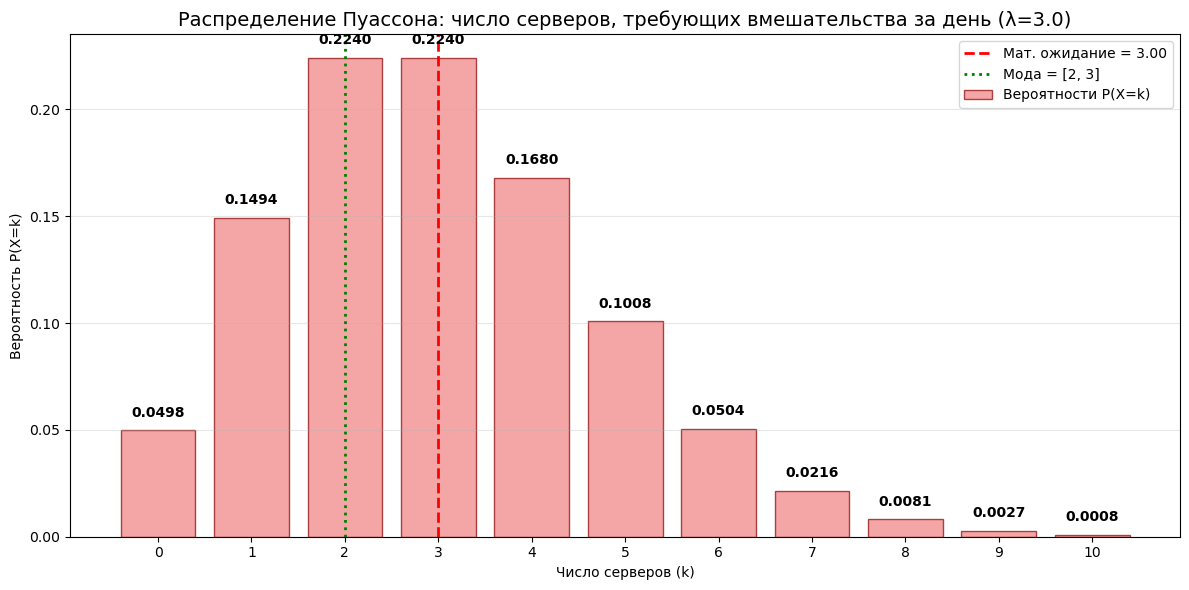

Распределение Пуассона с параметром λ = 3.0
Закон распределения (первые 11 значений):
           0
0   0.049787
1   0.149361
2   0.224042
3   0.224042
4   0.168031
5   0.100819
6   0.050409
7   0.021604
8   0.008102
9   0.002701
10  0.000810

Вероятность, что потребуется вмешательство не более чем для 5 серверов: 0.9161

Мат.ожидание:  3.0
Дисперсия:  3.0
Ср. кв. отклонение:  1.7320508075688772
Мода:  [2, 3]


In [31]:
# Закон распределения Пуассона
def poisson(lmbda, k):
    """Распределение Пуассона"""
    return (lmbda ** k) / (math.factorial(k)) * (math.e ** (-lmbda))

# Параметры распределения
n = 100  # Количество серверов
p = 0.03  # Вероятность поломки одного сервера в день
lmbda = n * p  # Параметр Пуассона (среднее число событий)

# Заполнение закона распределения (рассмотрим до 10 событий)
k_max = 10
X_poisson = {}
for k in range(k_max + 1):
    X_poisson[k] = poisson(lmbda, k)

df_poisson = pd.DataFrame(data=X_poisson.values(), index=X_poisson.keys())

# Математическое ожидание для Пуассона равно λ
m_poisson = lmbda

# Дисперсия для Пуассона также равна λ
d_poisson = lmbda

# Среднее квадратичное отклонение
w_poisson = math.sqrt(d_poisson)

# Мода для Пуассона: floor(λ) или floor(λ)-1, если λ целое
if lmbda == int(lmbda):
    mod_poisson = [int(lmbda) - 1, int(lmbda)]
else:
    mod_poisson = int(lmbda)

# Вероятность того, что потребуется вмешательство не более чем для 5 серверов
prob_leq_5 = sum([poisson(lmbda, k) for k in range(6)])

# Отображение многоугольника распределения
plt.figure(figsize=(12, 6))

k_values = list(X_poisson.keys())
probabilities = list(X_poisson.values())
bars = plt.bar(k_values, probabilities, color='lightcoral', 
               edgecolor='darkred', alpha=0.7, 
               label='Вероятности P(X=k)')

for bar, prob in zip(bars, probabilities):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.005,
             f'{prob:.4f}', ha='center', va='bottom', fontweight='bold')

plt.title(f'Распределение Пуассона: число серверов, требующих вмешательства за день (λ={lmbda})', fontsize=14)
plt.xlabel('Число серверов (k)')
plt.ylabel('Вероятность P(X=k)')
plt.grid(True, alpha=0.3, axis='y')
plt.xticks(k_values)

plt.axvline(x=m_poisson, color='red', linestyle='--', linewidth=2, 
            label=f'Мат. ожидание = {m_poisson:.2f}')
plt.axvline(x=mod_poisson[0] if isinstance(mod_poisson, list) else mod_poisson, 
            color='green', linestyle=':', linewidth=2, 
            label=f'Мода = {mod_poisson}')

plt.legend()
plt.tight_layout()
plt.show()

print("Распределение Пуассона с параметром λ =", lmbda)
print("Закон распределения (первые 11 значений):")
print(df_poisson)
print(f"\nВероятность, что потребуется вмешательство не более чем для 5 серверов: {prob_leq_5:.4f}")
print("\nМат.ожидание: ", m_poisson)
print("Дисперсия: ", d_poisson)
print("Ср. кв. отклонение: ", w_poisson)
print("Мода: ", mod_poisson)

Геометрический закон распределения  
HR-специалист в IT-компании проводит собеседования с кандидатами на позицию senior-разработчика. Вероятность того, что случайно выбранный кандидат подойдет компании, составляет 0.2. Специалист проводит собеседования до тех пор, пока не найдет подходящего кандидата. Случайная величина X — количество проведенных собеседований (включая успешное). Найти закон распределения, математическое ожидание, дисперсию, среднее квадратическое отклонение и моду. Построить многоугольник распределения для первых 20 собеседований.

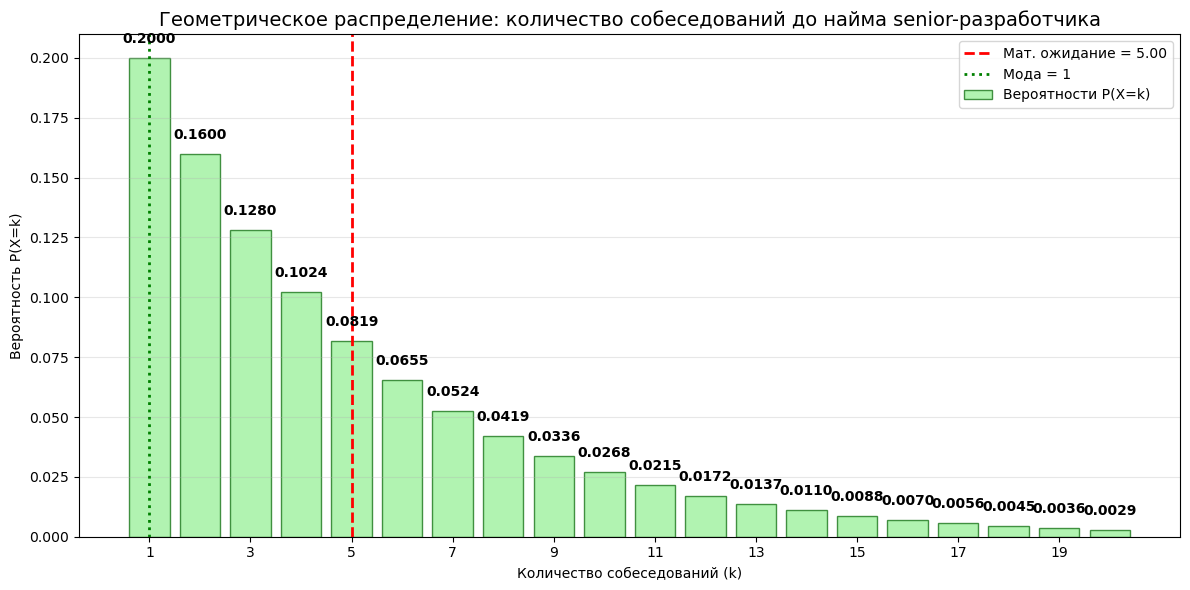

Геометрическое распределение с p = 0.2
Закон распределения (первые 20 значений):
           0
1   0.200000
2   0.160000
3   0.128000
4   0.102400
5   0.081920
6   0.065536
7   0.052429
8   0.041943
9   0.033554
10  0.026844
11  0.021475
12  0.017180
13  0.013744
14  0.010995
15  0.008796
16  0.007037
17  0.005629
18  0.004504
19  0.003603
20  0.002882

Вероятность, что потребуется более 20 собеседований: 0.011529

Мат.ожидание:  5.0
Дисперсия:  19.999999999999996
Ср. кв. отклонение:  4.472135954999579
Мода:  1


In [32]:
# Геометрический закон распределения
def geom(p, k):
    """Геометрическое распределение: вероятность первой удачи на k-й попытке"""
    return p * ((1 - p) ** (k - 1))

# Параметры распределения
p = 0.2  # Вероятность, что кандидат подойдет
max_k = 20  # Рассматриваем первые 20 попыток

# Заполнение закона распределения
X_geom = {}
cumulative_prob = 0
for k in range(1, max_k + 1):
    prob = geom(p, k)
    X_geom[k] = prob
    cumulative_prob += prob

# Добавим остаточную вероятность (более 20 попыток)
prob_more_than_20 = 1 - cumulative_prob

df_geom = pd.DataFrame(data=X_geom.values(), index=X_geom.keys())

# Математическое ожидание для геометрического распределения
m_geom = 1 / p

# Дисперсия для геометрического распределения
d_geom = (1 - p) / (p ** 2)

# Среднее квадратичное отклонение
w_geom = math.sqrt(d_geom)

# Мода для геометрического распределения всегда равна 1
mod_geom = 1

# Отображение многоугольника распределения
plt.figure(figsize=(12, 6))

k_values = list(X_geom.keys())
probabilities = list(X_geom.values())
bars = plt.bar(k_values, probabilities, color='lightgreen', 
               edgecolor='darkgreen', alpha=0.7, 
               label='Вероятности P(X=k)')

for bar, prob in zip(bars, probabilities):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.005,
             f'{prob:.4f}', ha='center', va='bottom', fontweight='bold')

plt.title('Геометрическое распределение: количество собеседований до найма senior-разработчика', fontsize=14)
plt.xlabel('Количество собеседований (k)')
plt.ylabel('Вероятность P(X=k)')
plt.grid(True, alpha=0.3, axis='y')
plt.xticks(range(1, max_k + 1, 2))

plt.axvline(x=m_geom, color='red', linestyle='--', linewidth=2, 
            label=f'Мат. ожидание = {m_geom:.2f}')
plt.axvline(x=mod_geom, color='green', linestyle=':', linewidth=2, 
            label=f'Мода = {mod_geom}')

plt.legend()
plt.tight_layout()
plt.show()

print("Геометрическое распределение с p =", p)
print("Закон распределения (первые 20 значений):")
print(df_geom)
print(f"\nВероятность, что потребуется более 20 собеседований: {prob_more_than_20:.6f}")
print("\nМат.ожидание: ", m_geom)
print("Дисперсия: ", d_geom)
print("Ср. кв. отклонение: ", w_geom)
print("Мода: ", mod_geom)

Гипергеометрический закон распределения  
На военных учениях участвует 25 солдат, из которых 8 являются снайперами. Для выполнения специального задания случайным образом отбирают 7 солдат. Случайная величина X — количество снайперов в отряде специального назначения. Найти закон распределения, математическое ожидание, дисперсию, среднее квадратическое отклонение и моду. Построить многоугольник распределения.

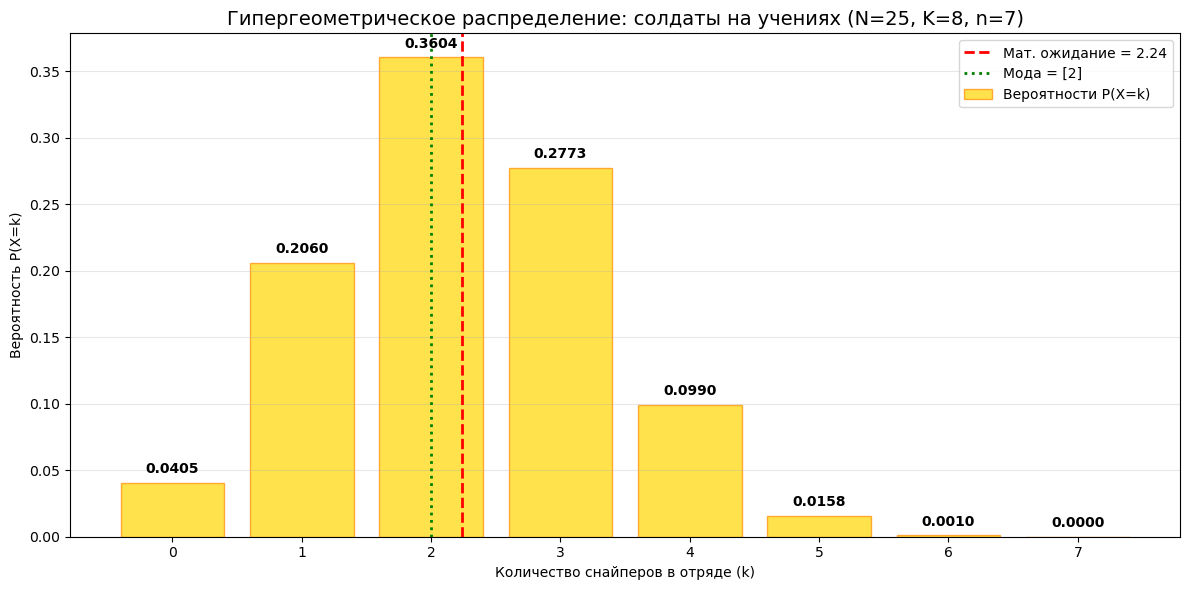

Гипергеометрическое распределение
Параметры: N = 25 , K = 8 , n = 7
Закон распределения:
          0
0  0.040458
1  0.205966
2  0.360441
3  0.277262
4  0.099022
5  0.015844
6  0.000990
7  0.000017

Мат.ожидание:  2.24
Дисперсия:  1.1424000000000003
Ср. кв. отклонение:  1.068831137270991
Мода:  [2]


In [33]:
# Гипергеометрический закон распределения
def hypergeom(N, K, n, k):
    """Гипергеометрическое распределение"""
    if k > min(n, K):
        return 0
    if k < max(0, n - (N - K)):
        return 0
    return math.comb(K, k) * math.comb(N - K, n - k) / math.comb(N, n)

# Параметры распределения
N = 25  # Общее количество солдат
K = 8   # Количество снайперов
n = 7   # Количество отобранных солдат

# Заполнение закона распределения
X_hyper = {}
for k in range(0, min(n, K) + 1):
    X_hyper[k] = hypergeom(N, K, n, k)

df_hyper = pd.DataFrame(data=X_hyper.values(), index=X_hyper.keys())

# Математическое ожидание для гипергеометрического распределения
m_hyper = n * (K / N)

# Дисперсия для гипергеометрического распределения
d_hyper = n * (K / N) * ((N - K) / N) * ((N - n) / (N - 1))

# Среднее квадратичное отклонение
w_hyper = math.sqrt(d_hyper)

# Мода для гипергеометрического распределения
mod_hyper = []
max_prob = max(X_hyper.values())
for k, prob in X_hyper.items():
    if abs(prob - max_prob) < 1e-10:
        mod_hyper.append(k)

# Отображение многоугольника распределения
plt.figure(figsize=(12, 6))

k_values = list(X_hyper.keys())
probabilities = list(X_hyper.values())
bars = plt.bar(k_values, probabilities, color='gold', 
               edgecolor='darkorange', alpha=0.7, 
               label='Вероятности P(X=k)')

for bar, prob in zip(bars, probabilities):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.005,
             f'{prob:.4f}', ha='center', va='bottom', fontweight='bold')

plt.title(f'Гипергеометрическое распределение: солдаты на учениях (N={N}, K={K}, n={n})', fontsize=14)
plt.xlabel('Количество снайперов в отряде (k)')
plt.ylabel('Вероятность P(X=k)')
plt.grid(True, alpha=0.3, axis='y')
plt.xticks(k_values)

plt.axvline(x=m_hyper, color='red', linestyle='--', linewidth=2, 
            label=f'Мат. ожидание = {m_hyper:.2f}')
plt.axvline(x=mod_hyper[0], color='green', linestyle=':', linewidth=2, 
            label=f'Мода = {mod_hyper}')

plt.legend()
plt.tight_layout()
plt.show()

print("Гипергеометрическое распределение")
print("Параметры: N =", N, ", K =", K, ", n =", n)
print("Закон распределения:")
print(df_hyper)
print("\nМат.ожидание: ", m_hyper)
print("Дисперсия: ", d_hyper)
print("Ср. кв. отклонение: ", w_hyper)
print("Мода: ", mod_hyper)